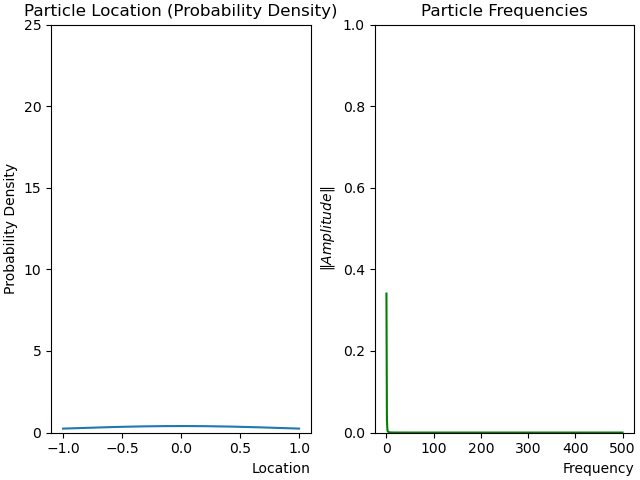

In [1]:
# uncertainty_principle.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


def f(x):
    # The Gaussian standard normal probability density function
    return (
        1
        / (sigma * np.sqrt(2 * np.pi))
        * np.exp((-1 / 2) * np.power(x, 2) / (np.power(sigma, 2)))
    )


def plot_samples(ts, ys, ax):
    global wave_pdf
    (wave_pdf,) = ax.plot(ts, ys)
    ax.set_title(f"Particle Location (Probability Density)")
    ax.set_xlabel("Location", loc="right")
    ax.set_ylabel("Probability Density")
    ax.set_ylim(0, 25)


def plot_powerspec(ps, ax):
    global wave_ps
    (wave_ps,) = ax.plot(range(len(ps)), ps, color="green")
    ax.set_title(f"Particle Frequencies")
    ax.set_xlabel("Frequency", loc="right")
    ax.set_ylabel(r"$\Vert Amplitude \Vert$")
    ax.set_ylim(0, 1)


def anim_frame_counter():
    global sigma
    n = 1
    while n < 1200:
        if n <= 600:
            sigma = 10 / n
        else:
            sigma = 10 / (1200 - n)
        n += 1
        yield n


def anim_draw_frame(t):
    global sigma
    ys = f(ts)
    wave_pdf.set_data(ts, ys)

    sigma /= 30
    ys = f(ts)
    ca = np.fft.rfft(ys) / 2
    ps = np.abs(ca) / len(ca)

    wave_ps.set_data(range(len(ps)), ps)

    return (
        wave_pdf,
        wave_ps,
    )


def main():
    global ts, sigma, anim

    ts = np.linspace(-1, 1, 1000, endpoint=False)

    sigma = 1
    ys = f(ts)

    ca = np.fft.rfft(ys) / 2
    ps = np.abs(ca) / len(ca)

    plt.close("all")
    fig = plt.figure("Uncertainty Principle", constrained_layout=True)

    gs = fig.add_gridspec(1, 2)
    ax_pdf = fig.add_subplot(gs[0, 0])
    ax_ps = fig.add_subplot(gs[0, 1])

    plot_samples(ts, ys, ax_pdf)
    plot_powerspec(ps, ax_ps)

    anim = FuncAnimation(
        ax_pdf.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        blit=True,
        repeat=False,
    )

    plt.show()


main()